In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

# Data Cleaning

In [89]:
nba_df = pd.read_csv("./NBA_DATA4/nba.games.stats.csv")
print(nba_df.shape)
nba_df.head(5)

(9840, 41)


,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [90]:
# Drop irrelevant column:
nba_df=nba_df.drop('Unnamed: 0', axis=1)

In [91]:
# create defence rebounds field for team and opponent:
nba_df['DefRebounds'] = nba_df['TotalRebounds'] - nba_df['OffRebounds']
nba_df['Opp.DefRebounds'] = nba_df['Opp.TotalRebounds'] - nba_df['Opp.OffRebounds']
nba_df.shape

(9840, 42)

In [92]:
# Cleaning texts for easier handling:
nba_df.columns = nba_df.columns.str.replace('Opp.', 'Opp')
nba_df.columns = nba_df.columns.str.replace('Opp3PointShots', 'OppX3PointShots' )

C:\Users\xin\AppData\Local\Temp/ipykernel_4028/1059231952.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  nba_df.columns = nba_df.columns.str.replace('Opp.', 'Opp')


In [93]:
# 2-class columns to Boolean:
nba_df['Home'] = nba_df['Home'].replace(['Home', 'Away'], [1,0]).astype(str).astype(int)
# 2-class columns to Boolean - Leave Column as such for ML:
nba_df['WINorLOSS'] = nba_df['WINorLOSS'].replace(['W', 'L'], [1,0]).astype(str).astype(int)
nba_df

,Team,Game,Date,Home,Oppnent,WINorLOSS,TeamPoints,OppnentPoints,FieldGoals,FieldGoalsAttempted,...,OppFreeThrows.,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls,DefRebounds,OppDefRebounds
0,ATL,1,2014-10-29,0,TOR,0,102,109,40,80,...,0.818,16,48,26,13,9,9,22,32,32
1,ATL,2,2014-11-01,1,IND,1,102,92,35,69,...,0.857,11,44,25,5,5,18,26,34,33
2,ATL,3,2014-11-05,0,SAS,0,92,94,38,92,...,0.711,11,50,25,7,9,19,15,27,39
3,ATL,4,2014-11-07,0,CHO,0,119,122,43,93,...,0.741,11,51,31,6,7,19,30,31,40
4,ATL,5,2014-11-08,1,NYK,1,103,96,33,81,...,0.727,13,44,26,2,6,15,29,29,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,WAS,78,2018-04-03,0,HOU,0,104,120,38,72,...,0.667,10,46,26,13,3,9,14,33,36
9836,WAS,79,2018-04-05,0,CLE,0,115,119,47,94,...,0.786,5,35,26,10,3,16,14,29,30
9837,WAS,80,2018-04-06,1,ATL,0,97,103,35,87,...,0.696,7,50,24,5,5,18,22,36,43
9838,WAS,81,2018-04-10,1,BOS,1,113,101,41,83,...,0.815,13,44,22,14,1,16,18,41,31


# Features Engineering

In [94]:
PIR = ((nba_df['TeamPoints'] + nba_df['TotalRebounds'] + nba_df['Assists']
        + nba_df['Steals'] + nba_df['Blocks'] + nba_df['OppTotalFouls'])

       # Missed Field Goals:
       - ((nba_df['FieldGoalsAttempted']- nba_df['FieldGoals'])

          # Missed Free Throws:
          +(nba_df['FreeThrowsAttempted'] - nba_df['FreeThrows'])
          + nba_df['Turnovers'] + nba_df['OppBlocks'] + nba_df['TotalFouls']))


OppPIR = ((nba_df['OppnentPoints'] + nba_df['OppTotalRebounds'] + nba_df['OppAssists']
           + nba_df['OppSteals'] + nba_df['OppBlocks'] + nba_df['TotalFouls'])
          - ((nba_df['OppFieldGoalsAttempted']- nba_df['OppFieldGoals'])
             +(nba_df['OppFreeThrowsAttempted'] - nba_df['OppFreeThrows'])
             + nba_df['OppTurnovers'] + nba_df['Blocks'] + nba_df['OppTotalFouls']))

nba_df['PIR'] = pd.Series(PIR)
nba_df['OppPIR'] = pd.Series(OppPIR)

In [95]:
nba_df['Month'] = [int(m[5:7]) for m in nba_df['Date']]
nba_df['Year'] = [int(y[:4]) for y in nba_df['Date']]
nba_df

,Team,Game,Date,Home,Oppnent,WINorLOSS,TeamPoints,OppnentPoints,FieldGoals,FieldGoalsAttempted,...,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls,DefRebounds,OppDefRebounds,PIR,OppPIR,Month,Year
0,ATL,1,2014-10-29,0,TOR,0,102,109,40,80,...,13,9,9,22,32,32,108,131,10,2014
1,ATL,2,2014-11-01,1,IND,1,102,92,35,69,...,5,5,18,26,34,33,128,88,11,2014
2,ATL,3,2014-11-05,0,SAS,0,92,94,38,92,...,7,9,19,15,27,39,85,122,11,2014
3,ATL,4,2014-11-07,0,CHO,0,119,122,43,93,...,6,7,19,30,31,40,111,142,11,2014
4,ATL,5,2014-11-08,1,NYK,1,103,96,33,81,...,2,6,15,29,29,31,119,95,11,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,WAS,78,2018-04-03,0,HOU,0,104,120,38,72,...,13,3,9,14,33,36,104,155,4,2018
9836,WAS,79,2018-04-05,0,CLE,0,115,119,47,94,...,10,3,16,14,29,30,129,138,4,2018
9837,WAS,80,2018-04-06,1,ATL,0,97,103,35,87,...,5,5,18,22,36,43,105,110,4,2018
9838,WAS,81,2018-04-10,1,BOS,1,113,101,41,83,...,14,1,16,18,41,31,134,110,4,2018


In [96]:
def seasons(d):
    m=d[5:7]
    y=d[:4]
    if (y =='2014' and m in ('10','11','12')) or (y=='2015' and m in ('01','02','03','04')):
        s='one'
    elif (y=='2015' and m in ('10','11','12')) or (y=='2016' and m in ('01','02','03','04')):
        s='two'
    elif (y=='2016' and m in ('10','11','12')) or (y=='2017' and m in ('01','02','03','04')):
        s='three'
    else:
        s='four'
    return (s)

nba_df['Season']=nba_df['Date'].apply(seasons)
nba_df

,Team,Game,Date,Home,Oppnent,WINorLOSS,TeamPoints,OppnentPoints,FieldGoals,FieldGoalsAttempted,...,OppBlocks,OppTurnovers,OppTotalFouls,DefRebounds,OppDefRebounds,PIR,OppPIR,Month,Year,Season
0,ATL,1,2014-10-29,0,TOR,0,102,109,40,80,...,9,9,22,32,32,108,131,10,2014,one
1,ATL,2,2014-11-01,1,IND,1,102,92,35,69,...,5,18,26,34,33,128,88,11,2014,one
2,ATL,3,2014-11-05,0,SAS,0,92,94,38,92,...,9,19,15,27,39,85,122,11,2014,one
3,ATL,4,2014-11-07,0,CHO,0,119,122,43,93,...,7,19,30,31,40,111,142,11,2014,one
4,ATL,5,2014-11-08,1,NYK,1,103,96,33,81,...,6,15,29,29,31,119,95,11,2014,one
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,WAS,78,2018-04-03,0,HOU,0,104,120,38,72,...,3,9,14,33,36,104,155,4,2018,four
9836,WAS,79,2018-04-05,0,CLE,0,115,119,47,94,...,3,16,14,29,30,129,138,4,2018,four
9837,WAS,80,2018-04-06,1,ATL,0,97,103,35,87,...,5,18,22,36,43,105,110,4,2018,four
9838,WAS,81,2018-04-10,1,BOS,1,113,101,41,83,...,1,16,18,41,31,134,110,4,2018,four


In [97]:
# Categorizing months into halfs (February contains the AllStar break). It will follow by dummies:

def halfs(x):
    if str(x) in ('10','11','12','1'):
        x = 'Pre_AllStar'
    else:
        x = 'Post_AllStar'
    return (x)

nba_df['Season_half']=nba_df['Month'].apply(halfs)

In [98]:
# Points Differance at the end of the game:

nba_df['diff_points']=abs(nba_df['TeamPoints']-nba_df['OppnentPoints'])

In [99]:
nba_df

,Team,Game,Date,Home,Oppnent,WINorLOSS,TeamPoints,OppnentPoints,FieldGoals,FieldGoalsAttempted,...,OppTotalFouls,DefRebounds,OppDefRebounds,PIR,OppPIR,Month,Year,Season,Season_half,diff_points
0,ATL,1,2014-10-29,0,TOR,0,102,109,40,80,...,22,32,32,108,131,10,2014,one,Pre_AllStar,7
1,ATL,2,2014-11-01,1,IND,1,102,92,35,69,...,26,34,33,128,88,11,2014,one,Pre_AllStar,10
2,ATL,3,2014-11-05,0,SAS,0,92,94,38,92,...,15,27,39,85,122,11,2014,one,Pre_AllStar,2
3,ATL,4,2014-11-07,0,CHO,0,119,122,43,93,...,30,31,40,111,142,11,2014,one,Pre_AllStar,3
4,ATL,5,2014-11-08,1,NYK,1,103,96,33,81,...,29,29,31,119,95,11,2014,one,Pre_AllStar,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,WAS,78,2018-04-03,0,HOU,0,104,120,38,72,...,14,33,36,104,155,4,2018,four,Post_AllStar,16
9836,WAS,79,2018-04-05,0,CLE,0,115,119,47,94,...,14,29,30,129,138,4,2018,four,Post_AllStar,4
9837,WAS,80,2018-04-06,1,ATL,0,97,103,35,87,...,22,36,43,105,110,4,2018,four,Post_AllStar,6
9838,WAS,81,2018-04-10,1,BOS,1,113,101,41,83,...,18,41,31,134,110,4,2018,four,Post_AllStar,12


# Team Rank (below) was tested, but caused features leakage, thus ignored

In [48]:
total_wins_season = pd.DataFrame(nba_df.groupby(['Team', 'Season'])['WINorLOSS'].sum())
total_wins_season

WINorLOSS
Team Season           
ATL  four           24
     one            60
     three          43
     two            48
BOS  four           55
...                ...
UTA  two            40
WAS  four           43
     one            46
     three          49
     two            41

[120 rows x 1 columns]

In [49]:
team_rank = nba_df.merge(total_wins_season, left_on=['Team','Season'], right_index = True)
team_rank

,Team,Game,Date,Home,Oppnent,WINorLOSS_x,TeamPoints,OppnentPoints,FieldGoals,FieldGoalsAttempted,...,DefRebounds,OppDefRebounds,PIR,OppPIR,Month,Year,Season,Season_half,diff_points,WINorLOSS_y
0,ATL,1,2014-10-29,0,TOR,0,102,109,40,80,...,32,32,108,131,10,2014,one,Post_AllStar,7,60
1,ATL,2,2014-11-01,1,IND,1,102,92,35,69,...,34,33,128,88,11,2014,one,Post_AllStar,10,60
2,ATL,3,2014-11-05,0,SAS,0,92,94,38,92,...,27,39,85,122,11,2014,one,Post_AllStar,2,60
3,ATL,4,2014-11-07,0,CHO,0,119,122,43,93,...,31,40,111,142,11,2014,one,Post_AllStar,3,60
4,ATL,5,2014-11-08,1,NYK,1,103,96,33,81,...,29,31,119,95,11,2014,one,Post_AllStar,7,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,WAS,78,2018-04-03,0,HOU,0,104,120,38,72,...,33,36,104,155,4,2018,four,Post_AllStar,16,43
9836,WAS,79,2018-04-05,0,CLE,0,115,119,47,94,...,29,30,129,138,4,2018,four,Post_AllStar,4,43
9837,WAS,80,2018-04-06,1,ATL,0,97,103,35,87,...,36,43,105,110,4,2018,four,Post_AllStar,6,43
9838,WAS,81,2018-04-10,1,BOS,1,113,101,41,83,...,41,31,134,110,4,2018,four,Post_AllStar,12,43


# DF for ML:

In [100]:
nba_df_for_ML = nba_df[['Game', 'Home','WINorLOSS', 'Season', 'Season_half']].copy()
nba_df_for_ML

,Game,Home,WINorLOSS,Season,Season_half
0,1,0,0,one,Pre_AllStar
1,2,1,1,one,Pre_AllStar
2,3,0,0,one,Pre_AllStar
3,4,0,0,one,Pre_AllStar
4,5,1,1,one,Pre_AllStar
...,...,...,...,...,...
9835,78,0,0,four,Post_AllStar
9836,79,0,0,four,Post_AllStar
9837,80,1,0,four,Post_AllStar
9838,81,1,1,four,Post_AllStar


# Avg last 5_games:

In [101]:
# Team stats coulmns are averaged for the last 5 games. The first 5 games are group_aggregated.
# In some runs, Opponent Columns were averaged too, but it was not beneficial

def five_last_games_avg(col):
    first_games_avg_dict = {}

    for idx in nba_df.index:
        sum_points=0
        if nba_df.loc[idx]['Game'] ==1:
            first_games_avg = (nba_df.iloc[idx:idx+5][col].sum())/5
            first_games_avg_dict.update({idx:first_games_avg})
            for i in range(5):
                first_games_avg_dict.update({idx+i:first_games_avg})
        elif nba_df.loc[idx]['Game'] > 5:
            y = nba_df.loc[idx]['Game'] -5
            for i in range(y,nba_df.loc[idx]['Game']):
                sum_points+=nba_df.loc[i][col]
                first_games_avg_dict.update({idx:(sum_points/5)})

    nba_df_for_ML[f'avg_{col}'] = pd.Series(first_games_avg_dict)

In [102]:
# VERY VERY SLOW:
# %%timeit
# 1 loop, best of 3: 5min 57s per loop

nba_df_columns_for_avg = ['PIR', 'OppPIR','TeamPoints',
                          'FieldGoalsAttempted', 'FieldGoals.',
                          'X3PointShotsAttempted', 'X3PointShots.',
                          'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
                          'DefRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls','diff_points']

for a in nba_df_columns_for_avg:
    five_last_games_avg(a)

# Calculating Rest Days:

In [103]:
from datetime import timedelta
nba_df['Game_Date'] = pd.to_datetime(nba_df['Date'])
nba_df['Game_Date']

0      2014-10-29
1      2014-11-01
2      2014-11-05
3      2014-11-07
4      2014-11-08
          ...    
9835   2018-04-03
9836   2018-04-05
9837   2018-04-06
9838   2018-04-10
9839   2018-04-11
Name: Game_Date, Length: 9840, dtype: datetime64[ns]

In [104]:
def scale_rest_days(i):
    x=nba_df.loc[i]['Game']
    if x>3:
        if (nba_df.loc[i]['Game_Date']- nba_df.loc[i-1]['Game_Date']).days==1:
            if (nba_df.loc[i]['Game_Date']- nba_df.loc[i-2]['Game_Date']).days==2:
                if (nba_df.loc[i]['Game_Date']- nba_df.loc[i-3]['Game_Date']).days==3:
                    return -3
                else:
                    return -1
            elif (nba_df.loc[i]['Game_Date']- nba_df.loc[i-2]['Game_Date']).days==3:
                return 1
            else:
                return 2
        elif (nba_df.loc[i]['Game_Date']- nba_df.loc[i-1]['Game_Date']).days==2:
            if (nba_df.loc[i]['Game_Date']- nba_df.loc[i-2]['Game_Date']).days==3:
                return 3
            else:
                return 4
        elif (nba_df.loc[i]['Game_Date']- nba_df.loc[i-1]['Game_Date']).days==3:
            return 5
        else:
            return 6
    else:
        return 0

In [105]:
nba_df['ind']=nba_df.index.values
nba_df_for_ML['rest_days_scale']= nba_df['ind'].apply(scale_rest_days)
nba_df_for_ML

,Game,Home,WINorLOSS,Season,Season_half,avg_PIR,avg_OppPIR,avg_TeamPoints,avg_FieldGoalsAttempted,avg_FieldGoals.,...,avg_FreeThrows.,avg_OffRebounds,avg_DefRebounds,avg_Assists,avg_Steals,avg_Blocks,avg_Turnovers,avg_TotalFouls,avg_diff_points,rest_days_scale
0,1,0,0,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,0.7122,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,0
1,2,1,1,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,0.7122,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,0
2,3,0,0,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,0.7122,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,0
3,4,0,0,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,0.7122,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,4
4,5,1,1,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,0.7122,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,78,0,0,four,Post_AllStar,129.2,101.8,107.4,82.8,0.5048,...,0.7538,9.8,32.8,30.0,9.6,3.2,13.2,17.0,17.0,3
9836,79,0,0,four,Post_AllStar,130.4,100.0,108.0,83.4,0.5136,...,0.7372,9.2,33.8,30.4,10.6,3.2,13.6,16.6,19.2,4
9837,80,1,0,four,Post_AllStar,129.4,99.4,108.8,84.0,0.5012,...,0.7472,8.2,33.8,30.2,11.0,3.6,12.4,18.2,19.0,1
9838,81,1,1,four,Post_AllStar,118.6,107.0,104.2,85.2,0.4702,...,0.7440,9.2,33.4,27.6,10.0,3.4,11.6,18.4,13.4,6


In [106]:
nba_df.loc[1]['Game_Date']-nba_df.loc[0]['Game_Date']

Timedelta('3 days 00:00:00')

# Create Wins Streak

In [107]:
def sum_wins():
    streak_dict = {}
    sum_wins = 0
    for idx in nba_df_for_ML.index:
        if nba_df_for_ML.loc[idx]['Game'] == 1:
            sum_wins = nba_df_for_ML.loc[idx]['WINorLOSS']
            streak_dict.update({idx:sum_wins})
        else:
            if nba_df_for_ML.loc[idx-1]['WINorLOSS'] == 0:
                sum_wins=0
                streak_dict.update({idx:sum_wins})
            else:
                sum_wins += nba_df_for_ML.loc[idx-1]['WINorLOSS']
                streak_dict.update({idx:sum_wins})
    nba_df_for_ML['wins_streak'] = pd.Series(streak_dict)

sum_wins()

In [108]:
print(nba_df_for_ML.shape)
nba_df_for_ML.head(10)

(9840, 24)


,Game,Home,WINorLOSS,Season,Season_half,avg_PIR,avg_OppPIR,avg_TeamPoints,avg_FieldGoalsAttempted,avg_FieldGoals.,...,avg_OffRebounds,avg_DefRebounds,avg_Assists,avg_Steals,avg_Blocks,avg_Turnovers,avg_TotalFouls,avg_diff_points,rest_days_scale,wins_streak
0,1,0,0,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,0,0
1,2,1,1,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,0,0
2,3,0,0,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,0,1
3,4,0,0,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,4,0
4,5,1,1,one,Pre_AllStar,110.2,115.6,103.6,83.0,0.4578,...,8.4,30.6,24.8,9.6,5.4,13.8,23.8,5.8,1,0
5,6,0,1,one,Pre_AllStar,110.0,104.2,101.4,81.2,0.4338,...,8.2,30.0,23.6,9.8,4.4,13.4,22.2,5.6,3,1
6,7,1,1,one,Pre_AllStar,108.0,107.8,101.0,82.6,0.4350,...,10.2,29.8,23.0,9.4,4.0,14.6,20.6,4.2,4,2
7,8,1,1,one,Pre_AllStar,120.0,106.4,105.4,79.2,0.4644,...,8.8,31.0,24.4,8.6,4.0,14.6,19.6,6.0,4,3
8,9,0,0,one,Pre_AllStar,118.0,110.0,100.4,78.6,0.4608,...,9.6,30.0,24.0,8.2,5.0,14.4,15.4,12.0,1,4
9,10,1,0,one,Pre_AllStar,119.6,115.0,101.6,79.4,0.4758,...,9.8,29.2,24.8,7.6,4.6,14.8,15.4,11.6,5,0


# Running Models:

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [110]:
nba_df_dumm = pd.get_dummies(nba_df_for_ML)
nba_df_for_ML.shape #(9840, 24)
nba_df_dumm.shape

(9840, 28)

In [111]:
nba_df_dumm.head(10)

,Game,Home,WINorLOSS,avg_PIR,avg_OppPIR,avg_TeamPoints,avg_FieldGoalsAttempted,avg_FieldGoals.,avg_X3PointShotsAttempted,avg_X3PointShots.,...,avg_TotalFouls,avg_diff_points,rest_days_scale,wins_streak,Season_four,Season_one,Season_three,Season_two,Season_half_Post_AllStar,Season_half_Pre_AllStar
0,1,0,0,110.2,115.6,103.6,83.0,0.4578,24.4,0.4128,...,23.8,5.8,0,0,0,1,0,0,0,1
1,2,1,1,110.2,115.6,103.6,83.0,0.4578,24.4,0.4128,...,23.8,5.8,0,0,0,1,0,0,0,1
2,3,0,0,110.2,115.6,103.6,83.0,0.4578,24.4,0.4128,...,23.8,5.8,0,1,0,1,0,0,0,1
3,4,0,0,110.2,115.6,103.6,83.0,0.4578,24.4,0.4128,...,23.8,5.8,4,0,0,1,0,0,0,1
4,5,1,1,110.2,115.6,103.6,83.0,0.4578,24.4,0.4128,...,23.8,5.8,1,0,0,1,0,0,0,1
5,6,0,1,110.0,104.2,101.4,81.2,0.4338,25.4,0.3686,...,22.2,5.6,3,1,0,1,0,0,0,1
6,7,1,1,108.0,107.8,101.0,82.6,0.4350,25.4,0.3886,...,20.6,4.2,4,2,0,1,0,0,0,1
7,8,1,1,120.0,106.4,105.4,79.2,0.4644,26.0,0.4032,...,19.6,6.0,4,3,0,1,0,0,0,1
8,9,0,0,118.0,110.0,100.4,78.6,0.4608,23.8,0.3516,...,15.4,12.0,1,4,0,1,0,0,0,1
9,10,1,0,119.6,115.0,101.6,79.4,0.4758,24.8,0.3364,...,15.4,11.6,5,0,0,1,0,0,0,1


In [112]:
X = nba_df_dumm.drop(['WINorLOSS'], axis=1)
y = nba_df_dumm.WINorLOSS

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    #stratify=nba_df_for_ML.WINorLOSS
                                                    )

In [113]:
dt_model_1 = DecisionTreeClassifier(min_samples_leaf=3, min_weight_fraction_leaf=0.01, max_leaf_nodes=40).fit(X_train, y_train)

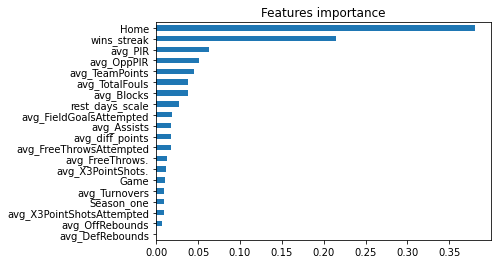

In [118]:

pd.Series(dt_model_1.feature_importances_, index=X_train.columns).sort_values().tail(20).plot.barh(title='Features importance');

In [131]:
# Cross Validation:

(cross_val_score(dt_model_1, X_test, y_test, cv=9, scoring='accuracy'))

array([0.55109489, 0.48905109, 0.58759124, 0.54945055, 0.5018315 ,
       0.52380952, 0.58241758, 0.50549451, 0.51648352])

In [146]:
y_test_pred = pd.DataFrame(dt_model_1.predict(X_test),
                    )

accuracy_score(y_test, y_test_pred)

0.566260162601626

# Random Forest & Grid Search:

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [148]:
random_forest = RandomForestClassifier(n_estimators=100,max_leaf_nodes=100, min_weight_fraction_leaf= 0.01)
my_param_grid = [{"n_estimators": [30, 70 ,100],"max_leaf_nodes": [30, 70, 100], "min_samples_leaf" : [30, 70, 100]}]
k = 7
random_forest_gs = GridSearchCV(random_forest, my_param_grid, scoring='neg_log_loss',cv=k)
random_forest_gs.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=RandomForestClassifier(max_leaf_nodes=100,
                                              min_weight_fraction_leaf=0.01),
             param_grid=[{'max_leaf_nodes': [30, 70, 100],
                          'min_samples_leaf': [30, 70, 100],
                          'n_estimators': [30, 70, 100]}],
             scoring='neg_log_loss')

In [149]:
random_forest_gs.best_params_

{'max_leaf_nodes': 30, 'min_samples_leaf': 30, 'n_estimators': 100}

In [151]:
random_forest_2 = random_forest_gs.best_estimator_

In [154]:
y_test_pred = pd.DataFrame(random_forest_2.predict(X_test))

In [155]:
accuracy_score(y_true=y_test, y_pred=y_test_pred).mean().round(3)

0.576